### Data Processing for Temperature data
> Do you have to do substantial data cleanup?
Extensive data cleaning isn't required as the dataset is partyl processed before being uploaded to Kaggle. However, the following steps are still required:
- Limiting data to 1980-01 to 2013-08
- renaming and removing redundant countries:
  - ![Clean up steps for countries](EDA_Global_Temp_Data/country_clean_up_steps.png)
  - We also replicate data from Sudan for South Sudan because the two are very close geographically this mehtod is simplistic and more logical than imputing average as per geo-coordinates of all the countries.

> What quantities do you plan to derive from your data?
- We derive the monthly temperature data for all (most) countries across the globe from 1980 to 2013
- We also derive the monthly global avg temperature for the global ocean across the globe from 1980 to 2013

> How will data processing be implemented?
Data processing has been implemented using **Pandas** in [EDA_Global_Temp_Data Python Notebook](EDA_Global_Temp_Data/EDAGlobalTemperature.ipynb)

> Show some screenshots of your data to demonstrate you have explored it.
![Country-wise temperature data](EDA_Global_Temp_Data/country_data.png)
![Country-wise temperature data statistics](EDA_Global_Temp_Data/country_stats.png)
![Country-wise temperature line chart](EDA_Global_Temp_Data/country_avg_temp_trend.png)
![Ocean temperature data](EDA_Global_Temp_Data/ocean_data.png)
![Ocean temperature data statistics](EDA_Global_Temp_Data/ocean_stats.png)
![Ocean temperature line chart](EDA_Global_Temp_Data/ocean_avg_temp_trend.png)
![Exploring the data](EDA_Global_Temp_Data/Sample_temp_EDA.png)

In [18]:
import pandas as pd

In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("berkeleyearth/climate-change-earth-surface-temperature-data")

print("Path to dataset files:", path)

100%|██████████| 84.7M/84.7M [00:03<00:00, 25.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2


In [20]:
!mkdir -p ./temp_dataset
!mv /root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2 sample_data/temp_dataset

In [21]:
!ls sample_data/temp_dataset

2				     GlobalLandTemperaturesByMajorCity.csv
GlobalLandTemperaturesByCity.csv     GlobalLandTemperaturesByState.csv
GlobalLandTemperaturesByCountry.csv  GlobalTemperatures.csv


In [22]:
df_city = pd.read_csv('sample_data/temp_dataset/GlobalLandTemperaturesByCity.csv')

column_names = df_city.columns
print(column_names)

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')


In [23]:
df_country = pd.read_csv('sample_data/temp_dataset/GlobalLandTemperaturesByCountry.csv')

column_names = df_country.columns
print(column_names)

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')


In [24]:
df_majorcity = pd.read_csv('sample_data/temp_dataset/GlobalLandTemperaturesByMajorCity.csv')

column_names = df_majorcity.columns
print(column_names)

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')


In [25]:
df_state = pd.read_csv('sample_data/temp_dataset/GlobalLandTemperaturesByState.csv')

column_names = df_state.columns
print(column_names)

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'State',
       'Country'],
      dtype='object')


## Data prep for Temperature Dataset

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns
import time
import argparse
import re
import warnings
warnings.filterwarnings('ignore')

In [99]:
df_country = pd.read_csv("sample_data/temp_dataset/GlobalLandTemperaturesByCountry.csv")
df_global = pd.read_csv("sample_data/temp_dataset/GlobalTemperatures.csv")

In [102]:
# keep only 1980-Present
df_country = df_country[df_country.dt.between('1980-01-01', '2013-08-01')]
df_global = df_global[df_global.dt.between('1980-01-01', '2013-08-01')]

In [104]:
print(df_country.columns)
display(df_country.head())
display(df_country.describe())

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
2834,1980-01-01,-4.073,0.518,Åland
2835,1980-02-01,-6.484,0.441,Åland
2836,1980-03-01,-3.947,0.466,Åland
2837,1980-04-01,2.928,0.597,Åland
2838,1980-05-01,6.154,0.241,Åland


,AverageTemperature,AverageTemperatureUncertainty
count,97768.000000,98172.00000
mean,19.242289,0.35044
std,10.483704,0.22691
min,-36.332000,0.05200
25%,13.451750,0.21900
50%,23.629000,0.29100
75%,26.775000,0.40600
max,38.842000,5.14100


In [108]:
rename_map = {'Congo (Democratic Republic Of The)': 'Congo, Democratic Republic of the'}
for og_name, new_name in rename_map.items():
  df_country[df_country.Country==og_name].Country = new_name

remove_countries = ['France (Europe)', 'United Kingdom (Europe)', 'Denmark (Europe)', 'Netherlands (Europe)', 'Antarctica']
df_country = df_country[df_country.Country.isin(remove_countries)==False]
df_country

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
2834,1980-01-01,-4.073,0.518,Åland
2835,1980-02-01,-6.484,0.441,Åland
2836,1980-03-01,-3.947,0.466,Åland
2837,1980-04-01,2.928,0.597,Åland
2838,1980-05-01,6.154,0.241,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


In [122]:
south_sudan_data = df_country[df_country['Country'] == 'Sudan'].copy()
south_sudan_data['Country'] = 'South Sudan'

# Concatenate the new South Sudan data with the original dataframe
df_country = pd.concat([df_country, south_sudan_data], ignore_index=True)

# Sort the dataframe by date and country to keep it organized
df_country = df_country.sort_values(['dt', 'Country'])

In [123]:
df_country.isnull().sum(), df_global.isnull().sum()

(dt                    0
 AverageTemperature    0
 Country               0
 dtype: int64,
 dt                                0
 LandAverageTemperature            0
 LandAndOceanAverageTemperature    0
 dtype: int64)

In [124]:
print(df_global.columns)
display(df_global.head())
display(df_global.describe())

Index(['dt', 'LandAverageTemperature', 'LandAndOceanAverageTemperature'], dtype='object')


,dt,LandAverageTemperature,LandAndOceanAverageTemperature
2760,1980-01-01,2.956,13.812
2761,1980-02-01,3.652,14.112
2762,1980-03-01,5.367,14.646
2763,1980-04-01,8.935,15.578
2764,1980-05-01,11.770,16.314


,LandAverageTemperature,LandAndOceanAverageTemperature
count,404.000000,404.000000
mean,9.236894,15.636819
std,4.148938,1.229525
min,2.558000,13.566000
25%,5.096500,14.430500
50%,9.436000,15.699500
75%,13.280500,16.793750
max,15.482000,17.609000


In [125]:
df_country = df_country.loc[:, ['dt', 'AverageTemperature', 'Country']]
df_global = df_global.loc[:, ['dt', 'LandAverageTemperature', 'LandAndOceanAverageTemperature']]

In [126]:
df_country

,dt,AverageTemperature,Country
404,1980-01-01,0.533,Afghanistan
808,1980-01-01,21.699,Africa
1212,1980-01-01,1.704,Albania
1616,1980-01-01,12.731,Algeria
2020,1980-01-01,27.202,American Samoa
...,...,...,...
94939,2013-08-01,28.564,Western Sahara
95343,2013-08-01,30.833,Yemen
95747,2013-08-01,20.887,Zambia
96151,2013-08-01,19.759,Zimbabwe


In [146]:
df_country.describe()

,AverageTemperature
count,96556.000000
mean,19.435605
std,10.466904
min,-36.332000
25%,13.941000
50%,23.856000
75%,26.826000
max,38.842000


In [130]:
df_global

,dt,LandAverageTemperature,LandAndOceanAverageTemperature
2760,1980-01-01,2.956,13.812
2761,1980-02-01,3.652,14.112
2762,1980-03-01,5.367,14.646
2763,1980-04-01,8.935,15.578
2764,1980-05-01,11.770,16.314
...,...,...,...
3159,2013-04-01,9.044,15.749
3160,2013-05-01,12.195,16.609
3161,2013-06-01,14.568,17.257
3162,2013-07-01,15.003,17.503


In [147]:
df_global.describe()

,LandAverageTemperature,LandAndOceanAverageTemperature
count,404.000000,404.000000
mean,9.236894,15.636819
std,4.148938,1.229525
min,2.558000,13.566000
25%,5.096500,14.430500
50%,9.436000,15.699500
75%,13.280500,16.793750
max,15.482000,17.609000


# EDA

In [145]:
def map_temperature_by_country(df_country_data, df_global_data):
    # Get land temperatures by country
    temp_by_country = df_country_data.set_index('Country')['AverageTemperature']

    # Get ocean temperature for the same date
    ocean_temp = df_global_data[df_global_data.dt == df_country_data.dt.iloc[0]]['LandAndOceanAverageTemperature'].iloc[0]

    data = [ dict(
        type = 'choropleth',
        locations = temp_by_country.index,
        z = temp_by_country.values,
        locationmode = 'country names',
        text = temp_by_country.index,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
        colorbar = dict(
            autotick = True,
            tickprefix = '',
            title = '# Average\nTemperature,\n°C'),
        colorscale = 'RdBu_r',
        zmin = -25,  # Fixed range to match the scale shown
        zmax = 25    # Fixed range to match the scale shown
        )
    ]

    # Calculate ocean color based on the fixed scale
    norm_temp = (ocean_temp - (-25)) / (50)  # Normalize between -25 and 25

    layout = dict(
        title = f'Average land and ocean temperature (1980-01-01)',
        geo = dict(
            showframe = False,
            showocean = True,
            oceancolor = '#da724a',
            projection = dict(
                type = 'orthographic',
                rotation = dict(
                    lon = 60,
                    lat = 10
                ),
            ),
            lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
            lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            )
        ),
    )
    return dict(data=data, layout=layout)

def test_map_temperature_by_country():
    # Filter for specific date
    land_data, ocean_data = df_country[df_country.dt == '1980-01-01'], df_global[df_global.dt == '1980-01-01']
    map_fig = map_temperature_by_country(land_data, ocean_data)
    py.iplot(map_fig, validate=False, filename='worldmap')

test_map_temperature_by_country()

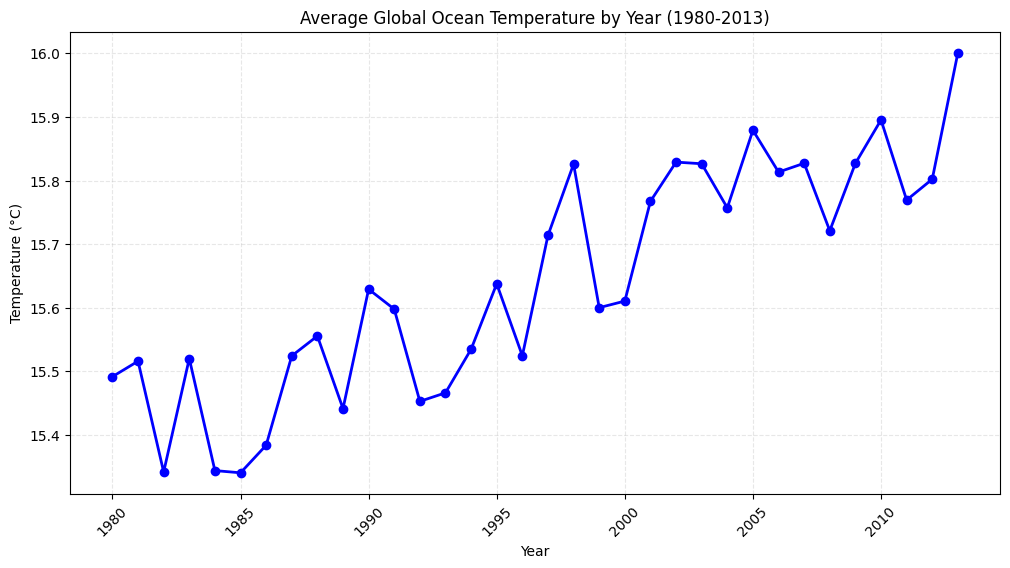

In [161]:
df_global['Year'] = pd.to_datetime(df_global['dt']).dt.year
yearly_avg = df_global.groupby('Year')['LandAndOceanAverageTemperature'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['Year'], yearly_avg['LandAndOceanAverageTemperature'],
         color='blue',
         linewidth=2,
         marker='o')

plt.title('Average Global Ocean Temperature by Year (1980-2013)', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Temperature (°C)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)

plt.xticks(rotation=45)

plt.show()


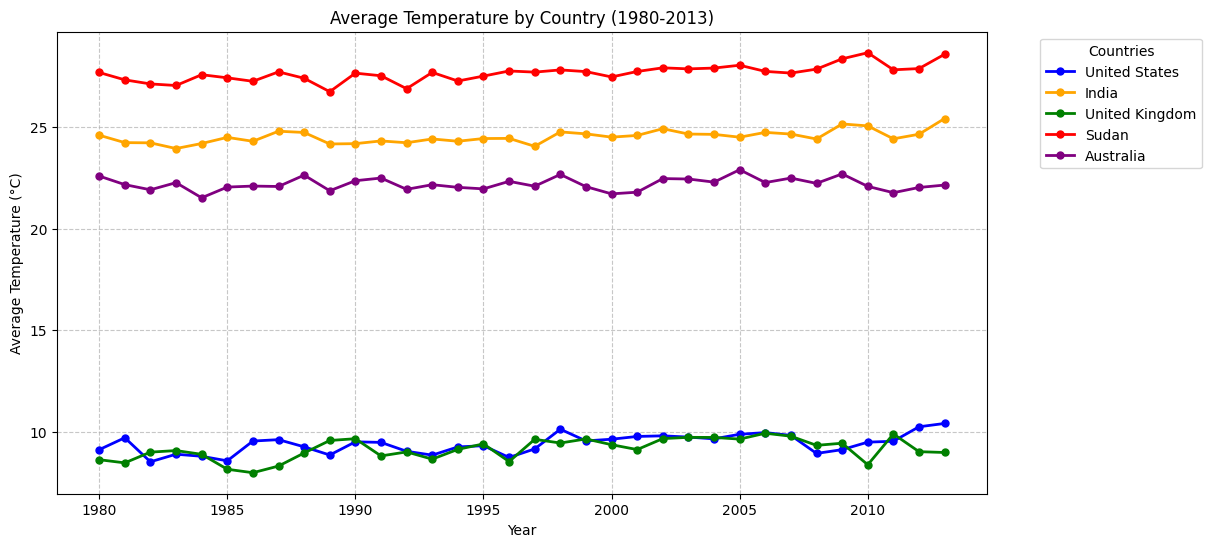

In [160]:
countries_of_interest = ['United States', 'India', 'United Kingdom', 'Sudan', 'Australia']

df_country['Year'] = pd.to_datetime(df_country['dt']).dt.year
yearly_avg = df_country[df_country['Country'].isin(countries_of_interest)].groupby(['Year', 'Country'])['AverageTemperature'].mean().reset_index()

plt.figure(figsize=(12, 6))

colors = ['blue', 'orange', 'green', 'red', 'purple']
for country, color in zip(countries_of_interest, colors):
    country_data = yearly_avg[yearly_avg['Country'] == country]
    plt.plot(country_data['Year'],
             country_data['AverageTemperature'],
             label=country,
             color=color,
             marker='o',
             markersize=5,
             linewidth=2)

plt.title('Average Temperature by Country (1980-2013)', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average Temperature (°C)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()